# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Define variables

In [2]:
model_names = ["Vilt", "Blip_large", "GiT_base", "GiT_large"] # skip , "Blip_base"

# image_names = ["Gaussian_5_2", "Gaussian_5_3", "Gaussian_5_4", "Gaussian_5_5",
#                "white_house_brown_cat", "white_house_brown_cow", "white_house_brown_dog", "white_house_brown_horse",
#                "white_house_green_cat", "white_house_green_unknown",
#                "white_house_pink_cow", "white_house_pink_unknown",
#                "white_house_purple_dog", "white_house_purple_horse",
#                "white_house_red_duck", "white_house_red_unknown",
#                "white_house_yellow_unknown"]

image_difficulty = {"Gaussian_5_2":1, "Gaussian_5_3":1, "Gaussian_5_4":1, "Gaussian_5_5":1,
                    "white_house_brown_cat":0, "white_house_brown_cow":0, "white_house_brown_dog":0, "white_house_brown_horse":0,
                    "white_house_green_cat":0.5, "white_house_green_unknown":0.5,
                    "white_house_pink_cow":0.5, "white_house_pink_unknown":0.5,
                    "white_house_purple_dog":0.5, "white_house_purple_horse":0.5,
                    "white_house_red_duck":0.5, "white_house_red_unknown":0.5,
                    "white_house_yellow_unknown":0.5}
image_names = list(image_difficulty.keys())

model_type = "VQA"

criteria = ["image_relatedness", "image_difficulty","used_language", "specificity", "question_length", "complexity"]
numeric_cols = criteria + ["difficulty", "no_tokens", "correct", "N", "Prob", "P_T_1", "P_T_2_N"]
major_criteria = ["used_language", "image_relatedness", "image_difficulty"]
Probs = ["Prob", "P_T_1", "P_T_2_N"]
letters = ['a', 'b', 'c', 'd', 'e', 'f']

D_type = "1"

numeric_cols_dtype = dict()
for c in numeric_cols: numeric_cols_dtype[c]=float
numeric_cols_dtype

{'image_relatedness': float,
 'image_difficulty': float,
 'used_language': float,
 'specificity': float,
 'question_length': float,
 'complexity': float,
 'difficulty': float,
 'no_tokens': float,
 'correct': float,
 'N': float,
 'Prob': float,
 'P_T_1': float,
 'P_T_2_N': float}

# Read full results

In [3]:
full_results_df = pd.read_excel(f"./{model_type}_full_results_D_type_{D_type}_manual.xlsx", sheet_name=f"{model_type}_D_type_{D_type}_results",
                             dtype=numeric_cols_dtype)

In [4]:
full_results_df.head()

,ID,image_name,example_question,question,answer_gt,used_language,specificity,question_length,complexity,image_relatedness,...,P_T_2_N,x_max_str,x_min_str,Prob_str,T_1_max_str,T_1_str,P_T_1_str,T_2_max_N_str,T_2_N_str,P_T_2_N_str
0,0,Gaussian_5_2,what is in the image?,what is in the image?,random+noise+nothing+t know+not sure+unknown+c...,0.0,1.0,0.0,0.0,0.0,...,0.035396,-2.3610375,-16.713715,0.07764137,1.7832804974941396,1.3263668739558916,0.033901606,1.738079,1.307533,0.035396315
1,1,Gaussian_5_2,what is the dominant color of the image?,what is the dominant color of the image?,color+gray+grey+nothing+t know+not sure+unknow...,0.0,1.0,0.0,0.0,0.0,...,0.166710,-0.49326575,-27.210875,0.20900321,3.319589136322892,1.9664954734678717,0.08871711,1.738079,1.307533,0.16670989
2,2,Gaussian_5_2,what does the image represent?,what does the image represent?,random+noise+nothing+t know+not sure+unknown+c...,0.0,1.0,0.0,0.0,0.0,...,0.039332,-2.180196,-17.993324,0.08220834,1.964737514053651,1.4019739641890212,0.031976696,1.738079,1.307533,0.03933237
3,3,Gaussian_5_2,why is the image random?,why is the image random?,random+t know+not sure+unknown+can't tell+none...,0.0,1.0,0.0,0.0,0.0,...,0.051415,-2.5192337,-19.845095,0.12248334,2.152690347564782,1.4802876448186593,0.034029774,1.738079,1.307533,0.05141516
4,4,Gaussian_5_2,why aren't there any objects in the image?,why aren't there any objects in the image?,random+noise+t know+not sure+unknown+can't tel...,0.0,1.0,0.0,0.0,0.0,...,0.029139,-3.1362438,-18.810205,0.06400901,1.9474464197595112,1.394769341566463,0.024084808,1.738079,1.307533,0.02913933


In [5]:
data = full_results_df.copy()

In [6]:
data.iloc[0]

ID                                                                   0
image_name                                                Gaussian_5_2
example_question                                 what is in the image?
question                                         what is in the image?
answer_gt            random+noise+nothing+t know+not sure+unknown+c...
used_language                                                      0.0
specificity                                                        1.0
question_length                                                    0.0
complexity                                                         0.0
image_relatedness                                                  0.0
image_difficulty                                                   1.0
difficulty                                                    0.416667
model_name                                                        Vilt
full_answer                                                       kite
clean_

# Add valid and normal column

In [7]:
not_yes_no = list()

for q in data["question"].values:
    if ("does he talk to him" in q) or ("did they read them" in q):
        not_yes_no.append(False)
    else:
        not_yes_no.append(True)
not_yes_no = np.array(not_yes_no)

In [8]:
not_nan = np.array(~(data['clean_answer']).isna())
not_qst_mark = np.array(~(data['clean_answer'].str.contains('?', na=True, regex=False)))

valid = np.where(not_nan & not_qst_mark & not_yes_no, 1, 0)

data["valid"] = valid

len(data)

14276

In [9]:
english = np.array((full_results_df['used_language']==0))
# related = np.array((full_results_df['image_relatedness']==0))
not_difficult = np.array((full_results_df['image_difficulty']<0.9)) # >>> != 1

normal = np.where(valid & english & not_difficult, 1, 0)

data["normal"] = normal

len(data)

14276

In [10]:
np.sum(normal)

11813

# Get Probs columns

In [11]:
P_results = dict()

for model_name in model_names+["all"]:
    model_dict= dict()
    selected_data = data.loc[data["normal"]==1]
    if "all"!=model_name: selected_data=selected_data.loc[selected_data["model_name"]==model_name]
    for P in Probs:
        correct = selected_data.loc[selected_data["correct"]==1]
        not_correct = selected_data.loc[selected_data["correct"]==0]
        model_dict[P] = [np.array(not_correct[P]), np.array(correct[P])]
    P_results[model_name] = model_dict.copy()


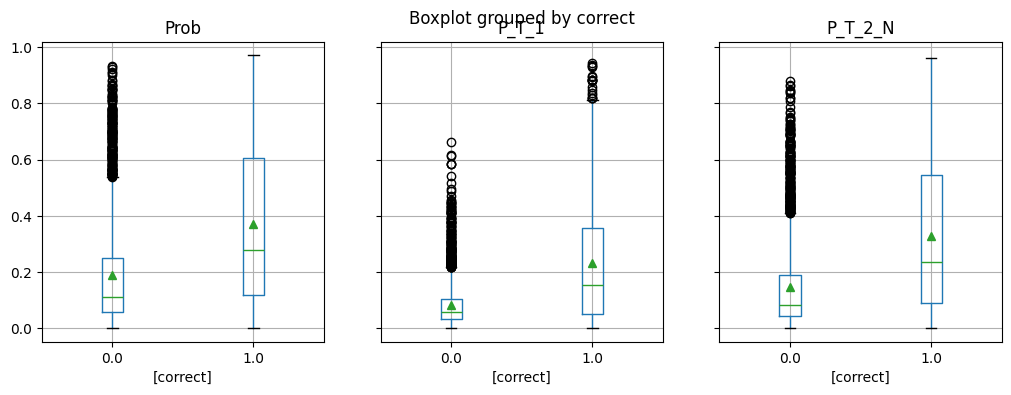

In [12]:
model_name = "GiT_base"

selected_data = data.loc[data["normal"]==1]
if "all"!=model_name: selected_data=selected_data.loc[selected_data["model_name"]==model_name]

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(12, 4))

for i in range(3):
    P_data = selected_data[["model_name", "correct", Probs[i]]]
    P_data.boxplot(by="correct", showmeans=True, ax=axs[i])

plt.show()

In [13]:
def boxplot_data(x):
    q75, q25  = np.percentile(x, [75, 25])
    iqr = q75 - q25
    mean = np.mean(x)
    median = np.median(x)
    return q75, q25, iqr, mean, median

In [14]:
Probs

['Prob', 'P_T_1', 'P_T_2_N']

In [15]:
all_rows = list()
for c in [0, 1]:
    for model_name in model_names+["all"]:
        row = [model_name, c]
        for P in Probs:
            selected_data = data.loc[data["normal"]==1]
            if "all"!=model_name: selected_data=selected_data.loc[selected_data["model_name"]==model_name]
            P_data = np.array(selected_data.loc[selected_data["correct"]==c][P])
            P_data = boxplot_data(P_data)
            for d in P_data:
                row.append(d)
        all_rows.append(row)


In [16]:
all_rows[3][6]

0.17687691500000002

In [17]:
cols = ["model_name", "correct"]
for P in Probs:
    for q in ["q75", "q25", "iqr", "mean", "median"]:
        cols.append(f"{P}_{q}")
cols

['model_name',
 'correct',
 'Prob_q75',
 'Prob_q25',
 'Prob_iqr',
 'Prob_mean',
 'Prob_median',
 'P_T_1_q75',
 'P_T_1_q25',
 'P_T_1_iqr',
 'P_T_1_mean',
 'P_T_1_median',
 'P_T_2_N_q75',
 'P_T_2_N_q25',
 'P_T_2_N_iqr',
 'P_T_2_N_mean',
 'P_T_2_N_median']

In [18]:
q_df = pd.DataFrame(all_rows, columns=cols)

In [19]:
num_cols = cols[1:]
q_df[num_cols] = q_df[num_cols].apply(pd.to_numeric)

In [20]:
# with pd.ExcelWriter(f"./{model_type}_q_data_analysis_manual.xlsx", engine="openpyxl", mode="w") as writer:
#     q_df.to_excel(writer, sheet_name=f"{model_type}_q_data_analysis", index_label='ID')

# Criteria distrbution

In [21]:
data.head()

,ID,image_name,example_question,question,answer_gt,used_language,specificity,question_length,complexity,image_relatedness,...,x_min_str,Prob_str,T_1_max_str,T_1_str,P_T_1_str,T_2_max_N_str,T_2_N_str,P_T_2_N_str,valid,normal
0,0,Gaussian_5_2,what is in the image?,what is in the image?,random+noise+nothing+t know+not sure+unknown+c...,0.0,1.0,0.0,0.0,0.0,...,-16.713715,0.07764137,1.7832804974941396,1.3263668739558916,0.033901606,1.738079,1.307533,0.035396315,1,0
1,1,Gaussian_5_2,what is the dominant color of the image?,what is the dominant color of the image?,color+gray+grey+nothing+t know+not sure+unknow...,0.0,1.0,0.0,0.0,0.0,...,-27.210875,0.20900321,3.319589136322892,1.9664954734678717,0.08871711,1.738079,1.307533,0.16670989,1,0
2,2,Gaussian_5_2,what does the image represent?,what does the image represent?,random+noise+nothing+t know+not sure+unknown+c...,0.0,1.0,0.0,0.0,0.0,...,-17.993324,0.08220834,1.964737514053651,1.4019739641890212,0.031976696,1.738079,1.307533,0.03933237,1,0
3,3,Gaussian_5_2,why is the image random?,why is the image random?,random+t know+not sure+unknown+can't tell+none...,0.0,1.0,0.0,0.0,0.0,...,-19.845095,0.12248334,2.152690347564782,1.4802876448186593,0.034029774,1.738079,1.307533,0.05141516,1,0
4,4,Gaussian_5_2,why aren't there any objects in the image?,why aren't there any objects in the image?,random+noise+t know+not sure+unknown+can't tel...,0.0,1.0,0.0,0.0,0.0,...,-18.810205,0.06400901,1.9474464197595112,1.394769341566463,0.024084808,1.738079,1.307533,0.02913933,1,0


In [22]:
selected_data = data.loc[(data["model_name"]=="Vilt") & (data["valid"]==1)]
selected_data.head()

,ID,image_name,example_question,question,answer_gt,used_language,specificity,question_length,complexity,image_relatedness,...,x_min_str,Prob_str,T_1_max_str,T_1_str,P_T_1_str,T_2_max_N_str,T_2_N_str,P_T_2_N_str,valid,normal
0,0,Gaussian_5_2,what is in the image?,what is in the image?,random+noise+nothing+t know+not sure+unknown+c...,0.0,1.0,0.0,0.0,0.0,...,-16.713715,0.07764137,1.7832804974941396,1.3263668739558916,0.033901606,1.738079,1.307533,0.035396315,1,0
1,1,Gaussian_5_2,what is the dominant color of the image?,what is the dominant color of the image?,color+gray+grey+nothing+t know+not sure+unknow...,0.0,1.0,0.0,0.0,0.0,...,-27.210875,0.20900321,3.319589136322892,1.9664954734678717,0.08871711,1.738079,1.307533,0.16670989,1,0
2,2,Gaussian_5_2,what does the image represent?,what does the image represent?,random+noise+nothing+t know+not sure+unknown+c...,0.0,1.0,0.0,0.0,0.0,...,-17.993324,0.08220834,1.964737514053651,1.4019739641890212,0.031976696,1.738079,1.307533,0.03933237,1,0
3,3,Gaussian_5_2,why is the image random?,why is the image random?,random+t know+not sure+unknown+can't tell+none...,0.0,1.0,0.0,0.0,0.0,...,-19.845095,0.12248334,2.152690347564782,1.4802876448186593,0.034029774,1.738079,1.307533,0.05141516,1,0
4,4,Gaussian_5_2,why aren't there any objects in the image?,why aren't there any objects in the image?,random+noise+t know+not sure+unknown+can't tel...,0.0,1.0,0.0,0.0,0.0,...,-18.810205,0.06400901,1.9474464197595112,1.394769341566463,0.024084808,1.738079,1.307533,0.02913933,1,0


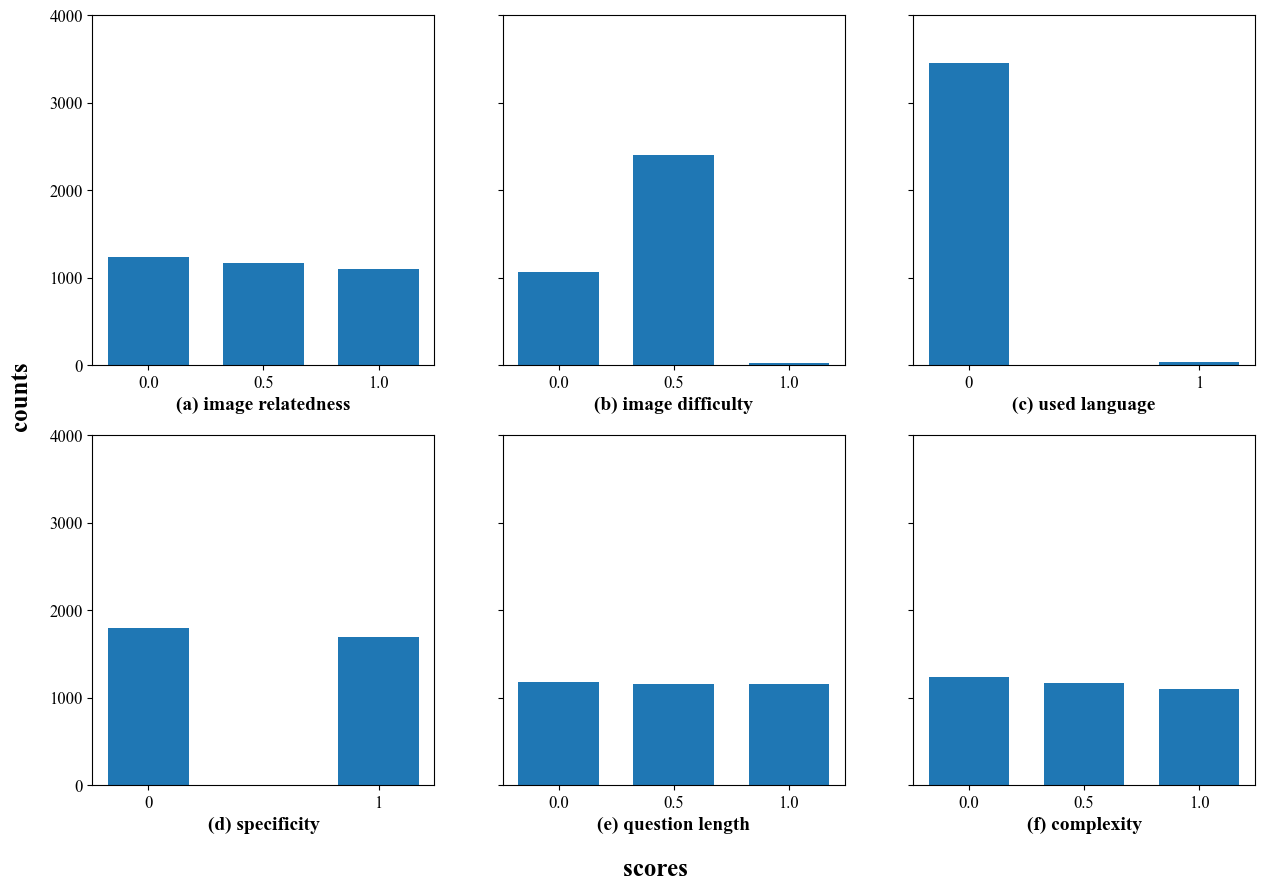

In [23]:
font = {'family' : 'times new roman',
        'size'   : 18,
        'weight' : 'normal'}

matplotlib.rc('font', **font)

rows, cols = 2, 3

fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(15, 10))

i=0

for row in range(rows):
    for col in range(cols):
        cr = criteria[i]
        v, c = np.unique(np.array(selected_data[cr]), return_counts=True)
        # color='red' if cr in major_criteria else 'green'
        ax = axs[row, col]
        ax.bar(v, c, align='center', width=0.35) #, color=color)
        ax.set_ylim([0, 4000])
        x_t = [0, 0.5, 1] if len(c)==3 else [0, 1]
        ax.set_xticks(x_t)
        ax.set_yticks(range(0, 4001, 1000))
        ax.tick_params(axis='x', labelsize=12)
        ax.tick_params(axis='y', labelsize=12)
        cr = cr.replace("_", " ")
        ax.set_xlabel(f"({letters[i]}) {cr}", fontdict={'size'   : 14,'weight' : 'bold'})
        i += 1

fig.text(0.07, 0.5, 'counts', va='center', rotation='vertical', fontdict={'weight' : 'bold'})
fig.text(0.5, 0.02, 'scores', ha='center', fontdict={'weight' : 'bold'})

plt.savefig(f"figs/all_criteria_barchart.png", bbox_inches='tight')
plt.show()

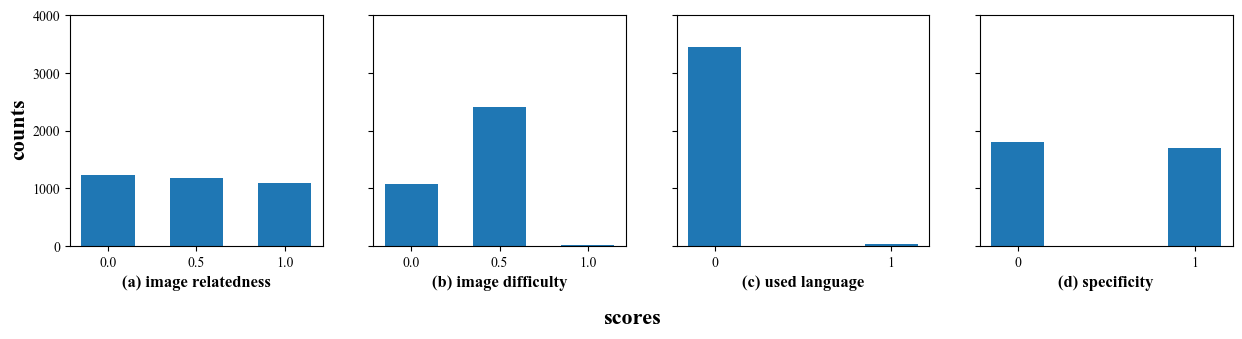

In [24]:
font = {'family' : 'times new roman',
        'size'   : 16,
        'weight' : 'normal'}

matplotlib.rc('font', **font)

rows, cols = 1, 4

fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(15, 3))

i=0
x_ticks = [0, 0.5, 1]

for _ in range(cols):
    cr = criteria[i]
    v, c = np.unique(np.array(selected_data[cr]), return_counts=True)
    # color='red' if cr in major_criteria else 'green'
    ax = axs[i]
    ax.bar(v, c, align='center', width=0.3)
    ax.set_ylim([0, 4000])
    x_t = [0, 0.5, 1] if len(c)==3 else [0, 1]
    ax.set_xticks(x_t)
    ax.set_yticks(range(0, 4001, 1000))
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    cr = cr.replace("_", " ")
    ax.set_xlabel(f"({letters[i]}) {cr}", fontdict={'size'   : 12,'weight' : 'bold'})
    i += 1

fig.text(0.085, 0.5, 'counts', va='center', rotation='vertical', fontdict={'weight' : 'bold'})
fig.text(0.5, -0.15, 'scores', ha='center', fontdict={'weight' : 'bold'})

plt.savefig(f"figs/text_related_criteria_barchart.png", bbox_inches='tight')
plt.show()

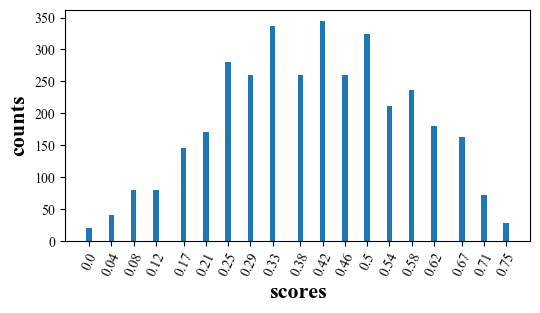

In [25]:
font = {'family' : 'times new roman',
        'size'   : 16,
        'weight' : 'normal'}

matplotlib.rc('font', **font)


fig, axs = plt.subplots(figsize=(6, 3))

i=0

v, c = np.unique(np.array(selected_data["difficulty"]), return_counts=True)
v = [round(i,2) for i in v]
# color='red' if cr in major_criteria else 'green'
axs.bar(v, c, align='center', width=0.01)
# axs.set_ylim([0, 4000])
# x_t = [0, 0.5, 1] if len(c)==3 else [0, 1]
axs.set_xticks(v)
axs.set_xticklabels(v, rotation=65)
# plt.set_yticks(range(0, 4001, 1000))
axs.tick_params(axis='x', labelsize=10)
axs.tick_params(axis='y', labelsize=10)
axs.set_xlabel("scores", fontdict={'size' : 16,'weight' : 'bold'})
axs.set_ylabel("counts", fontdict={'size' : 16,'weight' : 'bold'})

# axs.text(0.07, 0.5, 'counts', va='center', rotation='vertical', fontdict={'weight' : 'bold'})
# axs.text(0.5, -0.1, 'scores', ha='center', fontdict={'weight' : 'bold'})

plt.savefig(f"figs/D_barchart.png", bbox_inches='tight')
plt.show()

In [26]:
vs, cs = np.unique(np.array(selected_data["difficulty"]), return_counts=True)

for v, c in zip(vs, cs):
    print(f"{round(v, 2)} & {c} \\\\")

0.0 & 20 \\
0.04 & 40 \\
0.08 & 80 \\
0.12 & 80 \\
0.17 & 145 \\
0.21 & 170 \\
0.25 & 280 \\
0.29 & 260 \\
0.33 & 337 \\
0.38 & 260 \\
0.42 & 345 \\
0.46 & 260 \\
0.5 & 324 \\
0.54 & 212 \\
0.58 & 237 \\
0.62 & 180 \\
0.67 & 162 \\
0.71 & 72 \\
0.75 & 27 \\


In [27]:
for v in vs:
    print(round(v,2), end=",")

0.0,0.04,0.08,0.12,0.17,0.21,0.25,0.29,0.33,0.38,0.42,0.46,0.5,0.54,0.58,0.62,0.67,0.71,0.75,

In [28]:
selected_data.keys()

Index(['ID', 'image_name', 'example_question', 'question', 'answer_gt',
       'used_language', 'specificity', 'question_length', 'complexity',
       'image_relatedness', 'image_difficulty', 'difficulty', 'model_name',
       'full_answer', 'clean_answer', 'no_tokens', 'correct', 'N', 'Prob',
       'P_T_1', 'P_T_2_N', 'x_max_str', 'x_min_str', 'Prob_str', 'T_1_max_str',
       'T_1_str', 'P_T_1_str', 'T_2_max_N_str', 'T_2_N_str', 'P_T_2_N_str',
       'valid', 'normal'],
      dtype='object')

In [29]:
for cr in criteria:
    vs, cs = np.unique(np.array(selected_data[cr]), return_counts=True)
    print(f">>>>>>>>>>>>> {cr}")
    for v, c in zip(vs, cs):
        print(f"{round(v, 2)} & {c} \\\\")
    

>>>>>>>>>>>>> image_relatedness
0.0 & 1229 \\
0.5 & 1170 \\
1.0 & 1092 \\
>>>>>>>>>>>>> image_difficulty
0.0 & 1068 \\
0.5 & 2403 \\
1.0 & 20 \\
>>>>>>>>>>>>> used_language
0.0 & 3452 \\
1.0 & 39 \\
>>>>>>>>>>>>> specificity
0.0 & 1794 \\
1.0 & 1697 \\
>>>>>>>>>>>>> question_length
0.0 & 1177 \\
0.5 & 1157 \\
1.0 & 1157 \\
>>>>>>>>>>>>> complexity
0.0 & 1229 \\
0.5 & 1170 \\
1.0 & 1092 \\
